# FAI Coursework One [15 Marks]
# Introduction

Coursework 1 studies the python implementation of `Route Finding Problem` and `8 Puzzle Problems` program which is adapted from AIMA. The questions are on your understanding of concept of search algorithms (uninformed and informed) and their implementation. Students are expected to master the knowledge of formulating problems and using tree searching algorithms to solve them. Students are also required to evluate search algorithms under different setting.  The main goal is to give you first-hand experience on implementing search techniques for solving the two problems in Python, one of the mostly adapted high level languages and analytic tools in business and research.

# Marks

Coursework 1 accounts for 15% of the COMP1037 marks. Corresponding marks will be awarded for answering each of the sub-questions in `FAIcw1.ipynb`. Report should be written using this file as the template.

1. Answer questions using `Markdown` cell.
2. Use `Code` cell to input your code. 
**Note: a. please run your code in the notebook and upload your notebook together with all the outputs. b. avoid using problem setting requires more than 2 mins to get the output.**


# Plagiarism vs. Group Discussions

As you should know, there is no tolerance of plagiarism, and any breach of which will be dealt with according to the University's standard policies. Please be very careful not to cross the boundary into plagiarism while having general discussions regarding the coursework to promote the generation of new ideas and to enhance the learning experience. The important part is that when you sit down to actually do the work and write the answers, you do it individually. If you do this, and you truly understand what you have written, you will not be guilty of plagiarism. Do NOT, under any circumstances, share code or share figures, graphs or charts, etc.

# Deadline and submission procedure

The submission deadline is 5pm on the **13  April 2021** via Moodle. Late submission results into a 5% reduction of your coursework mark for each weekday. Any work handed in after the 20th April will receive zero marks.

Name your submission file: FAIcw1-XXX.ipynb, where XXX should be your student ID number, and submit a single file via Moodle.

If you can’t submit your coursework on time due to Extenuating Circumstances, please contact your personal tutor first. I am only granting an extension of submission based on his / her recommendation.


***Please remove the above text while writing your coursework report.***


In [2]:
from FAIcw1_tool import *

## Answer the following questions related to the *Route finding problem*
### 1. In the code cell below, finish the implementation of `greedy_tree_search` [1 Mark]

In [8]:
def greedy_tree_search(problem, h=None):
    h = h or problem.h # if h=None, h = problem.h, otherwise, h=h
    return best_first_tree_search(problem, f=lambda n:h(n)) 

### 2.  In the code cell below, initialize a romania map problem with Initial state = Arad and Goal state = Giurgiu. Use BFS, DFS, UCS, A* and Greedy search to solve the problem. Print out the routes generated by each search algorithm. Use markdown cell to answer what is the optimal solution in given problem, and which algorithms will surely generate optimal solutions.  [2 Marks] 

In [3]:
romania = Map(romania_links,romania_locations)

In [4]:
r0 = RouteProblem('A', 'G', map=romania) #initial state = 'A', goal state = 'G'

In [5]:
print("Greedy Tree Search: ",path_states(greedy_tree_search(r0)))

['A', 'S', 'R', 'P', 'B', 'G']

In [6]:
# BFS
print("BFS: ",path_states(breadth_first_bfs(r0)))

['A', 'S', 'F', 'B', 'G']

In [9]:
print("DFS: ", path_states(depth_first_bfs(r0)))

['A', 'Z', 'O', 'S', 'R', 'P', 'B', 'G']

In [7]:
#Uniform Cost Search
print("UCS: ", path_states(uniform_cost_search(r0)))

['A', 'S', 'R', 'P', 'B', 'G']

In [8]:
# A* Search
print("A*: ", path_states(astar_tree_search(r0)))

['A', 'S', 'R', 'P', 'B', 'G']

### 3. Note, you are suggest to use `breadth_first_bfs` and `depth_first_bfs` instead of `breadth_first_tree_search` and `depth_first_tree_search`. Use Markdown cell to explain the reason behind this. [1 Mark] 

We are using Breadth First BFS and Depth First BFS instead of Breadth First & Depth First tree search because of the better efficiency and better optimalisation PriorityQueue provides, while breadth_first_tree_search uses "FIFOQueue" (First in First out), and depth_first_tree_search uses "LIFOQueue" (last in first out) which reduces the efficiency since the code will pop an element that is in the last or first in the queue, rather than popping the element with the minimum cost. 


## Answer the following questions related to the  *8 puzzle Game Problem*
### 4. What is the action defined in the `EightPuzzle` implementation, how it related to the two operators on lecture slides, how many different actions the problem have [2 Marks] 

Action defined: "moving" from one tiles to another, which basically swaps the index number of an element with the blank element.
How it relates: The two operators used in the lecture is "expand" and 'test". Expand means, after a move, we ask possible moves available for the next action. Test means, after a move, we check if this state after the cell is moved is the goal state or not the goal state.
How many different actions: There could be a total of 24 actions. However, in each move there could only be 2-4 actions possible (if it is in corner only 2, in middle 4)

### 5. List two initial states cannot be solvable (Markdown cell), prove your answer using code (Code cell) [2 Marks] 

If the problem have an odd number inversion (a result of a number that exceeds its goal place), then it will be unsolvable.
1. Example (1,2,3,4,0,5,6,8,7). No 7 is the inversion since its shouldnt be after no 8.
2. Example (1,2,3,4,0,5,8,7,6). The number of inversion here is odd, therefore, its not solvable.

In [3]:
err_board = EightPuzzle((1,2,3,4,0,5,6,8,7))
for i in path_states(astar_tree_search(err_board)):
    print(board8(i))

AssertionError: 

In [4]:
err_board2 = EightPuzzle((1,2,3,4,0,5,8,7,6))
for i in path_states(astar_tree_search(err_board2)):
    print(board8(i))

AssertionError: 

### 6. Use A* solve the following 8 puzzle and print out the total number of moves. Illustrate the solution using board presentation. [2 Marks] 
 <img style="float: centre;" src="8_puzzle.jpg" width="25%"> 

In [9]:
eightpuzzle = EightPuzzle((4,8,6,7,0,3,2,1,5))
count = 0
for i in path_states(astar_tree_search(eightpuzzle)):
    print(board8(i))
    count += 1
print("Total number of moves: ", count -1) #remove first state

4 8 6
7 _ 3
2 1 5

4 _ 6
7 8 3
2 1 5

4 6 _
7 8 3
2 1 5

4 6 3
7 8 _
2 1 5

4 6 3
7 8 5
2 1 _

4 6 3
7 8 5
2 _ 1

4 6 3
7 _ 5
2 8 1

4 _ 3
7 6 5
2 8 1

4 3 _
7 6 5
2 8 1

4 3 5
7 6 _
2 8 1

4 3 5
7 6 1
2 8 _

4 3 5
7 6 1
2 _ 8

4 3 5
7 _ 1
2 6 8

4 3 5
_ 7 1
2 6 8

4 3 5
2 7 1
_ 6 8

4 3 5
2 7 1
6 _ 8

4 3 5
2 _ 1
6 7 8

4 3 5
_ 2 1
6 7 8

_ 3 5
4 2 1
6 7 8

3 _ 5
4 2 1
6 7 8

3 2 5
4 _ 1
6 7 8

3 2 5
4 1 _
6 7 8

3 2 _
4 1 5
6 7 8

3 _ 2
4 1 5
6 7 8

3 1 2
4 _ 5
6 7 8

3 1 2
_ 4 5
6 7 8

_ 1 2
3 4 5
6 7 8

Total number of moves:  27


### 7. use `report` to evluate 5 search algorithms (BFS, DFS, UCS, A* and Greedy Search) on different problems, together with result of report, provide your interpretation on the optimality and search efficiency of each search algorithm. [2 Marks] 

In [24]:
r1 = RouteProblem('A', 'O', map=romania)
r2 = RouteProblem('C', 'E', map=romania)
r3 = RouteProblem('O', 'E', map=romania)
r4 = RouteProblem('N', 'O', map=romania)
r5 = RouteProblem('E', 'G', map=romania)

show_report = report([breadth_first_bfs, depth_first_bfs, uniform_cost_search, astar_tree_search, greedy_tree_search], [r1,r2,r3,r4,r4])

breadth_first_bfs:
       11 nodes |        5 goal |     146 path cost |       2 path actions | RouteProblem('A', 'O')
       86 nodes |       34 goal |     508 path cost |       5 path actions | RouteProblem('C', 'E')
      140 nodes |       56 goal |     730 path cost |       6 path actions | RouteProblem('O', 'E')
       49 nodes |       20 goal |     867 path cost |       7 path actions | RouteProblem('N', 'O')
       49 nodes |       20 goal |     867 path cost |       7 path actions | RouteProblem('N', 'O')
      335 nodes |      135 goal |    3118 path cost |      27 path actions | TOTAL

depth_first_bfs:
        5 nodes |        3 goal |     146 path cost |       2 path actions | RouteProblem('A', 'O')
       37 nodes |       15 goal |    1338 path cost |      14 path actions | RouteProblem('C', 'E')
       39 nodes |       16 goal |    1534 path cost |      15 path actions | RouteProblem('O', 'E')
       30 nodes |       13 goal |     970 path cost |      10 path actions | Rou

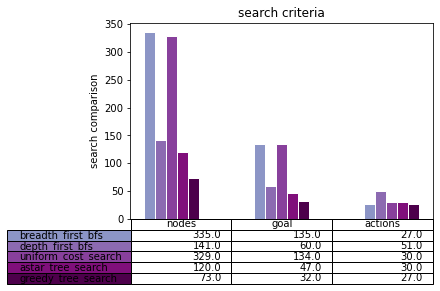

In [25]:
show_bar(show_report)

Most Optimal as blind search: Uniform Cost Search 
Least Optimal: Depth First BFS, since it has the most path cost (4958)
The Best Search Algorithm: A*, since it has one of the lowest nodes, although in some cases, Greedy Tree Search is better.

### 8. Use  `report` and 5 different initial states, evluate heuristic function `h1` and `h2` of `EightPuzzle`, which one is better? provide your interpretation. (hint: you can define a new A* search function with a specified heuristic and pass the new search function to `report` function )  [3 Marks] 


In [22]:
board1 = EightPuzzle((1,2,3,8,0,5,7,6,4))
board2 = EightPuzzle((1,0,3,4,2,5,7,8,6))
board3 = EightPuzzle((1,3,0,4,2,5,7,8,6))
board4 = EightPuzzle((1,3,0,4,5,6,7,8,2))
board5 = EightPuzzle((1,0,3,4,5,6,8,2,7))

def astar_tree_search1(problem, h1=None):
    """Search nodes with minimum f(n) = g(n) + h(n), with no `reached` table."""
    h1 = h1 or problem.h1 # if h=None, h = problem.h, otherwise, h=h
    return best_first_tree_search(problem, f=lambda n: g(n) + h1(n))

def astar_tree_search2(problem, h2=None):
    """Search nodes with minimum f(n) = g(n) + h(n), with no `reached` table."""
    h2 = h2 or problem.h2 # if h=None, h = problem.h, otherwise, h=h
    return best_first_tree_search(problem, f=lambda n: g(n) + h2(n))

show_report2 = report([astar_tree_search1,astar_tree_search2], [board1,board2,board3,board4,board5]) 

astar_tree_search1:
   20,551 nodes |    7,660 goal |      20 path cost |      20 path actions | EightPuzzle((1, 2, 3, 8, 0, 5, 7, 6, 4),
   30,630 nodes |   11,439 goal |      21 path cost |      21 path actions | EightPuzzle((1, 0, 3, 4, 2, 5, 7, 8, 6),
   46,766 nodes |   17,468 goal |      22 path cost |      22 path actions | EightPuzzle((1, 3, 0, 4, 2, 5, 7, 8, 6),
  129,142 nodes |   48,178 goal |      24 path cost |      24 path actions | EightPuzzle((1, 3, 0, 4, 5, 6, 7, 8, 2),
  705,140 nodes |  263,493 goal |      27 path cost |      27 path actions | EightPuzzle((1, 0, 3, 4, 5, 6, 8, 2, 7),
  932,229 nodes |  348,238 goal |     114 path cost |     114 path actions | TOTAL

astar_tree_search2:
    2,097 nodes |      783 goal |      20 path cost |      20 path actions | EightPuzzle((1, 2, 3, 8, 0, 5, 7, 6, 4),
    3,408 nodes |    1,271 goal |      21 path cost |      21 path actions | EightPuzzle((1, 0, 3, 4, 2, 5, 7, 8, 6),
    5,645 nodes |    2,104 goal |      22 path cos

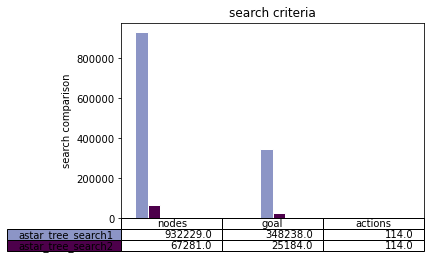

In [23]:
show_bar(show_report2)

After creating new 2 astar tree search, we modify the h1 and h2 so that we could use both heuristic function. In the graph demonstrated, hl has more nodes with a total of 932.229 nodes while h2 only checked a total of 67.281 nodes. This proves that the Manhattan Heuristic (h2) is better since it checks minimum amount of nodes compared to h1.